<a href="https://colab.research.google.com/github/saniajain3/Credit-card-fraud-detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install snapML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.3 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

In [4]:
raw_data=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv')
print("There are "+str(len(raw_data))+" observations in the credit card fraud dataset.")
print("there are "+str(len(raw_data.columns))+" variables in the dataset ")

There are 284807 observations in the credit card fraud dataset.
there are 31 variables in the dataset 


In [5]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
raw_data['Class'].value_counts()

,count
Class,
0,284315
1,492



*In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.*

In [7]:
n_replicas=10

#inflating the original datset
big_raw_data=pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)
print("There are "+str(len(big_raw_data))+ " observations in the inflated dataset.")
print("There are "+str(len(big_raw_data.columns))+" variables in the dataset.")

big_raw_data.head()

There are 2848070 observations in the inflated dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


*Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.*

In [8]:
#get the set of distinct classes
labels=big_raw_data['Class'].unique()
print("There are "+str(len(labels))+" distinct classes.")

sizes=big_raw_data['Class'].value_counts()
print("Class distribution:"+str(sizes))

There are 2 distinct classes.
Class distribution:Class
0.0    2843150
1.0       4920
Name: count, dtype: int64


* the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.*

Minimum amount:0.0
Maximum amount:25691.16
203.0


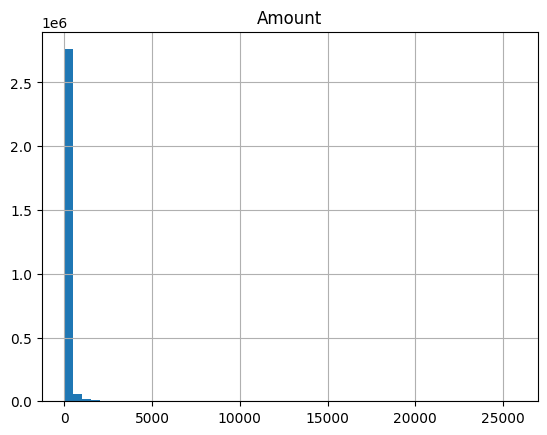

In [9]:
big_raw_data.hist(column='Amount', bins=50)
min_amount=big_raw_data['Amount'].min()
max_amount=big_raw_data['Amount'].max()
print("Minimum amount:"+str(min_amount))
print("Maximum amount:"+str(max_amount))
percentile=big_raw_data['Amount'].quantile(0.9)
print(percentile)

In [10]:
#data preprocessing
from sklearn.preprocessing import StandardScaler
big_raw_data.iloc[:,1:30]=StandardScaler().fit_transform(big_raw_data.iloc[:,1:30])
data_matrix=big_raw_data.values
# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (2278456, 29) Y_train.shape= (2278456,)
X_test.shape= (569614, 29) Y_test.shape= (569614,)


In [12]:
#to manage class imbalance compute the sample weights
w_train=compute_sample_weight('balanced',y_train)

from sklearn.tree import DecisionTreeClassifier
sklearn_dt=DecisionTreeClassifier(max_depth=4, random_state=35)
t0=time.time()
sklearn_dt.fit(X_train,y_train,sample_weight=w_train)
sklearn_train_time=time.time()-t0
print("[Scikit learn] Training time(s): {0:.5f}".format(sklearn_train_time))

[Scikit learn] Training time(s): 41.64044


In [13]:
from snapml import SnapDecisionTreeClassifier
# to set the number of CPU threads used at training time, set the n_jobs parameter
# for reproducible output across multiple function calls, set random_state to a given integer value
snapml_dt=SnapDecisionTreeClassifier(max_depth=4,random_state=45,n_jobs=4)

t0=time.time()
snapml_dt.fit(X_train,y_train, sample_weight=w_train)
snapml_time=time.time()-t0
print("[Snap ML] Training time(s): {0:.5f}".format(snapml_time))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[Snap ML] Training time(s): 7.39003


Evaluate the ScikitLearn and Snap ML Decision Tree Classifier Models

In [33]:
training_speedup=sklearn_train_time/snapml_time
print('[Decision tree classifier] Snap ML vs Scikit-learn speedup '+str(training_speedup))
sklearn_pred=sklearn_dt.predict(X_test)
print(sklearn_pred[:10])


[Decision tree classifier] Snap ML vs Scikit-learn speedup 1.478166597610439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
#ROC-AUC score from the predictions
sklearn_roc_auc=roc_auc_score(y_test,sklearn_pred)
print('[Scikit-learn] ROC-AUC score: {0:.3f}'.format(sklearn_roc_auc))

[Scikit-learn] ROC-AUC score: 0.937


In [31]:
snapml_pred=snapml_dt.predict(X_test)
print(snapml_pred[:5])
snapml_roc_auc=roc_auc_score(y_test,snapml_pred)
print('[Snap ML] ROC-AUC score: {0:.3f}'.format(snapml_roc_auc))

[0. 0. 0. 0. 0.]
[Snap ML] ROC-AUC score: 0.939


In [20]:
from sklearn.svm import LinearSVC
sklearn_svm=LinearSVC(class_weight='balanced', random_state=31,fit_intercept=False)
t0=time.time()
sklearn_svm.fit(X_train,y_train)
sklearn_time=time.time()-t0
print("[Scikit learn] Training time(s): {0:.5f}".format(sklearn_time))

[Scikit learn] Training time(s): 33.27616


In [22]:
from snapml import SupportVectorMachine
snapml_svm=SupportVectorMachine(class_weight='balanced',random_state=31,n_jobs=4,fit_intercept=False)
t0=time.time()
snapml_svm.fit(X_train,y_train)
snapml_time=time.time()-t0
print("[Snap ML] Training time(s): {0:.5f}".format(snapml_time))

[Snap ML] Training time(s): 28.17033


In [26]:
training_speedup=sklearn_time/snapml_time
print('[Support vector machine] Snap ML vs Scikit-learn speedup '+str(training_speedup))
sklearn_pred=sklearn_svm.decision_function(X_test)
acc_sklearn=roc_auc_score(y_test,sklearn_pred)
print('[Scikit-learn] ROC-AUC score: {0:.3f}'.format(acc_sklearn))
snapml_pred=snapml_svm.predict(X_test)
acc_snapml=roc_auc_score(y_test,snapml_pred)
print('[Snap ML] ROC-AUC score: {0:.3f}'.format(acc_snapml))

[Support vector machine] Snap ML vs Scikit-learn speedup 1.1812485360322351
[Scikit-learn] ROC-AUC score: 0.982
[Snap ML] ROC-AUC score: 0.945


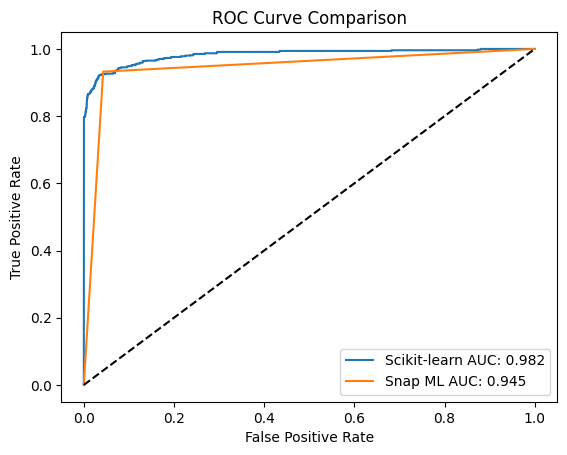

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for Scikit-learn
fpr, tpr, _ = roc_curve(y_test, sklearn_pred)
sklearn_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Scikit-learn AUC: {sklearn_auc:.3f}')

# Compute ROC curve and AUC for Snap ML
fpr_snap, tpr_snap, _ = roc_curve(y_test, snapml_pred)
snapml_auc = auc(fpr_snap, tpr_snap)
plt.plot(fpr_snap, tpr_snap, label=f'Snap ML AUC: {snapml_auc:.3f}')

# Final touches
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
